## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_result = pd.merge(mouse_metadata,study_results,on = "Mouse ID" , how='outer')
# Display the data table for preview
merge_result.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_result.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_merge_result = merge_result[merge_result.duplicated(['Mouse ID','Timepoint'])]
print(duplicate_merge_result)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_merge_result.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,5.0,5.0,5.000000,5.000000,5.000000
mean,21.0,26.0,10.000000,50.110118,0.200000
std,0.0,0.0,7.905694,4.012413,0.447214
min,21.0,26.0,0.000000,45.000000,0.000000
25%,21.0,26.0,5.000000,47.570392,0.000000
50%,21.0,26.0,10.000000,49.880528,0.000000
75%,21.0,26.0,15.000000,53.442020,0.000000
max,21.0,26.0,20.000000,54.657650,1.000000


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_result = merge_result.drop_duplicates(['Mouse ID','Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
merge_result.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
merge_result_df = merge_result.groupby(['Drug Regimen'])
mean_merge_result = round(merge_result_df['Tumor Volume (mm3)'].mean(),3)
median_merge_result = round(merge_result_df['Tumor Volume (mm3)'].median(),3)
var_merge_result = round(merge_result_df['Tumor Volume (mm3)'].var(),3)
std_merge_result = round(merge_result_df['Tumor Volume (mm3)'].std(),3)
sem_merge_result = round(merge_result_df['Tumor Volume (mm3)'].sem(),3)



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
#Creating DataFrame
total_table = pd.DataFrame({"mean":mean_merge_result,"median":median_merge_result,
                            "variance":var_merge_result,"standard deviation":std_merge_result,
                            "standard error of the mean(SEM)":sem_merge_result})
total_table


,mean,median,variance,standard deviation,standard error of the mean(SEM)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

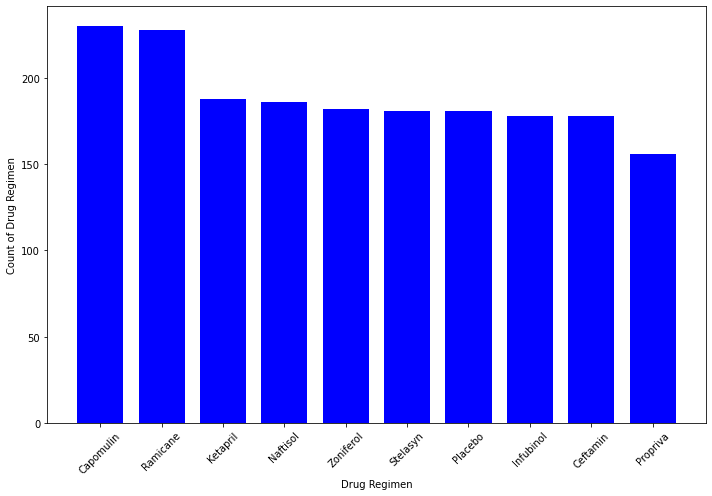

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#finding the count per Drug Regimen
bar_plot_table = merge_result_df['Drug Regimen'].count().sort_values(ascending =False)

#bar_plot_table=bar_plot_table.sort_values('Drug Regimen')
#Creating new DataFrame
bar_plot_table_df=pd.DataFrame({"Count of Drug Regimen":bar_plot_table})

#Plotting the Bar Graph
bar_plot_table_df.plot(kind="bar", 
                       color='b', 
                       figsize = (10,7),
                       legend = False, alpha = 1,
                       rot = 45 , 
                       width = 0.75,
                       align = "center")

#Labeling the graph with X,Y coordinates,titles and displaying with proper layout
plt.title("")
plt.ylabel("Count of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.axis('tight')
plt.tight_layout()
plt.show()


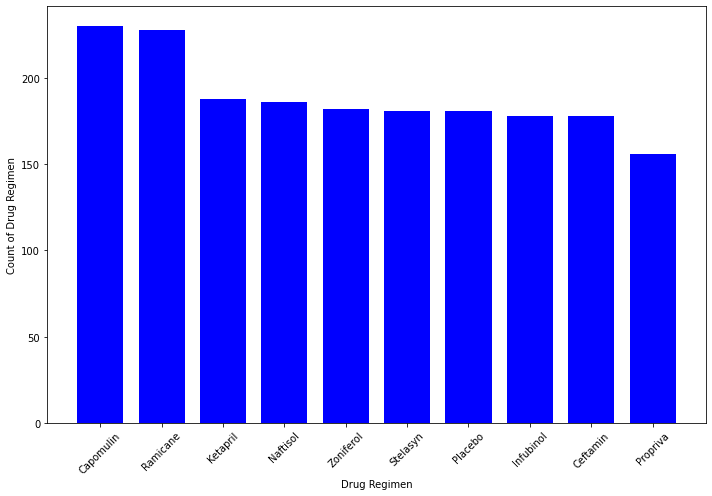

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#creating list from dataframe data
yaxis_merge_results=bar_plot_table_df['Count of Drug Regimen'].sort_values(ascending =False).tolist()
#yaxis_merge_results=yaxis_merge_results.sort_values(ascending =False)
xaxis_count_result=bar_plot_table_df.index.get_level_values(0).tolist()
x_axis = np.arange(len(xaxis_count_result)) 

#Ploting the graph
plt.figure(figsize=(10,7))
plt.bar(x_axis,yaxis_merge_results,color='b', alpha=1, align="center",width=0.75)

#Creating ticks on X bar and labeling them 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xaxis_count_result,rotation=45)

#Labeling the graph with X,Y coordinates,titles and displaying with proper layout
plt.axis('tight')
plt.title("")
plt.ylabel("Count of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()


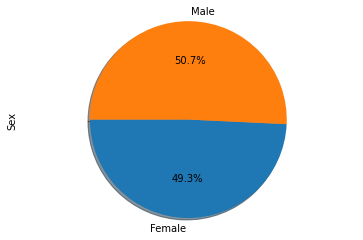

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mouse_sex_pie = merge_result.groupby(['Sex'])
sex_mouse  = merge_result.groupby(['Sex'])
sex_mouse_plot = sex_mouse['Sex'].count()


#Pie Chart
sex_mouse_plot.plot(kind = "pie",shadow = True, startangle = 180,autopct="%1.1f%%")

plt.axis("equal")
plt.title("")
plt.ylabel('Sex')
plt.show()


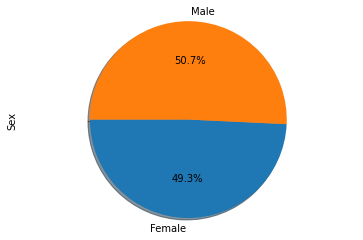

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_plot_pie_df=pd.DataFrame({"Count":sex_mouse_plot})
count_mouse=mouse_sex_plot_pie_df['Count'].tolist()
sex_of_mouse=mouse_sex_plot_pie_df.index.get_level_values(0).tolist()


#Pie Chart
plt.pie(count_mouse,shadow = True, startangle = 180,autopct = "%1.1f%%", labels=sex_of_mouse)
plt.axis("equal")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
successful_regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#Creating data frame for successful drug regimen
successful_regimen_df=merge_result[merge_result['Drug Regimen'].isin(successful_regimen)]

#Merging Drug Regimen and Mouse Id
successful_regimen_gby=successful_regimen_df.groupby(['Drug Regimen','Mouse ID'])

#Summing the Volumn based on Mouse id
vol_successful_regimen=pd.DataFrame(successful_regimen_gby['Tumor Volume (mm3)'].sum())


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
#Creating empty List
Outliers=[]
Outlier_list=[]
    
#For loop to get the outlier for successful regimen
for successful_regim in successful_regimen:
    all_limits=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)==successful_regim].quantile([.25,.5,.75])
    Outliers.append(pd.DataFrame({"Drug Regimen":successful_regim,"All limits":all_limits['Tumor Volume (mm3)'],}))
    
#For loop for lower and upper quartile and IQR
for i in range(len(successful_regimen)):
    lower=Outliers[i-1].loc[(0.25),"All limits"]
    upper=Outliers[i-1].loc[(0.75),"All limits"]
    IQR=upper-lower
    lower_bound=lower - (1.5*IQR)
    upper_bound=upper + (1.5*IQR)
    current_regimen=Outliers[i-1].loc[(0.25),"Drug Regimen"]
    
#Printing the IQR
    print(f"IQR for {current_regimen} is {round(IQR,4)}")
    Outlier_single=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)==current_regimen]
    Outlier_list.append(pd.DataFrame(Outlier_single.loc[(Outlier_single["Tumor Volume (mm3)"]<lower_bound)|(Outlier_single["Tumor Volume (mm3)"]>upper_bound)]))
print("")

#Concatenate all the data frame for outlier and display them 
print("Following are the Outliers: ")
pd.concat(Outlier_list)

IQR for Ceftamin is 346.4337
IQR for Capomulin is 63.2522
IQR for Ramicane is 46.5123
IQR for Infubinol is 289.4527

Following are the Outliers: 


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    f966              182.529864
             r157              183.195878
             w150              124.154476
Ramicane     w678               88.166373
             y449              181.439088

<ipython-input-24-06dd5c2ad642>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(successful_regimen)


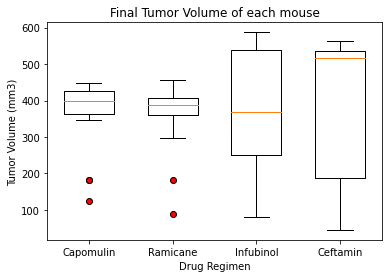

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Creating seperate Dataframe for individual Drug Regimen

Capomulin=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)=='Capomulin']
Capomulin_vol=Capomulin['Tumor Volume (mm3)']
Ramicane=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)=='Ramicane']
Ramicane_vol=Ramicane['Tumor Volume (mm3)']
Infubinol=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)=='Infubinol']
Infubinol_vol=Infubinol['Tumor Volume (mm3)']
Ceftamin=vol_successful_regimen[vol_successful_regimen.index.get_level_values(0)=='Ceftamin']
Ceftamin_vol=Ceftamin['Tumor Volume (mm3)']

#Plottog Box plot
fig1, ax1 = plt.subplots()
Data_df=[Capomulin_vol,Ramicane_vol,Infubinol_vol,Ceftamin_vol]
ax1.set_title('Final Tumor Volume of each mouse')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(successful_regimen)
ax1.set_xlabel('Drug Regimen')
red_outlier = dict(markerfacecolor='r')
ax1.boxplot(Data_df,widths = 0.6, patch_artist = False,flierprops=red_outlier)
plt.show()

## Line and Scatter Plots

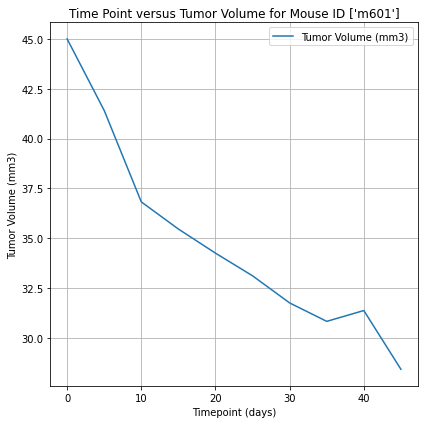

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Dataframe for Capomulin 
line_regimen_all=merge_result[merge_result['Drug Regimen']=='Capomulin']
#line_regimen_all=merge_result[merge_result['Drug Regimen']=='Capomulin']

#creating list for one mosuse id with random name
line_regimen_one=line_regimen_all['Mouse ID'].sample().tolist()

#Finding all the data for one random mouse
line_regimen=line_regimen_all[line_regimen_all['Mouse ID'].isin(line_regimen_one)]

#plotting
line_regimen_plt=line_regimen.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(6,6),title=f"Time Point versus Tumor Volume for Mouse ID {line_regimen_one}")



plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.tight_layout()
plt.show()


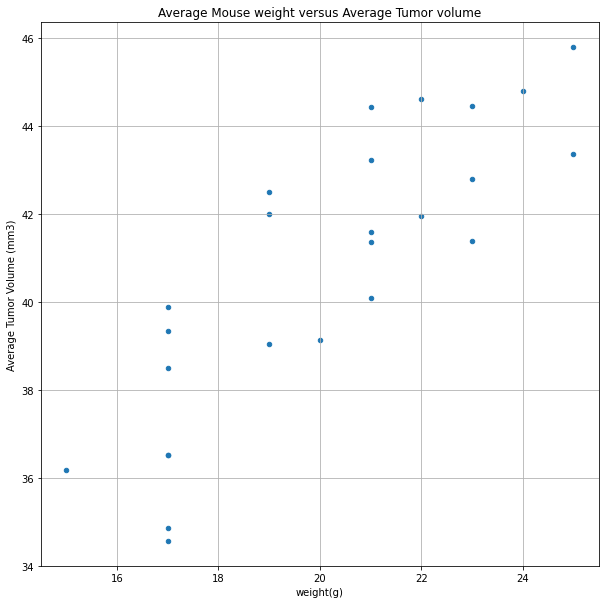

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Gorup by for scatter plot
scatter_regimen = line_regimen_all.groupby(["Mouse ID"])
#Finding average for the weight
scatter_regimen_weight=scatter_regimen["Weight (g)"].mean()
#Finding average volumn 
scatter_regimen_volumn=scatter_regimen["Tumor Volume (mm3)"].mean()
#Creating DataFrame
scatter_regimen_df=pd.DataFrame({"scatter_regimen_weight":scatter_regimen_weight,"scatter_regimen_volumn":scatter_regimen_volumn})
#Plotting Scatter Plot
scatter_regimen_df.plot(kind="scatter", x='scatter_regimen_weight', y='scatter_regimen_volumn', grid=True, figsize=(10,10),title="Average Mouse weight versus Average Tumor volume")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("weight(g)")
plt.show()

## Correlation and Regression

correlation coefficient is : 0.8419363424694718


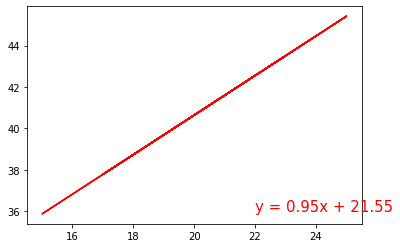

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(scatter_regimen_weight, scatter_regimen_volumn)
regress_values = scatter_regimen_weight * slope + intercept

#equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting
plt.plot(scatter_regimen_weight,regress_values,"r-")

#line equation plot
plt.annotate(line_eq,(22,36),fontsize=15,color="red")
print(f"correlation coefficient is : {rvalue}")
plt.show()
